<a href="https://colab.research.google.com/github/techwithanirudh/Automatic-Image-Captioning/blob/master/DeepFake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -r sample_data
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

rm: cannot remove 'sample_data': No such file or directory
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
R

In [2]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

from selenium import webdriver

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.


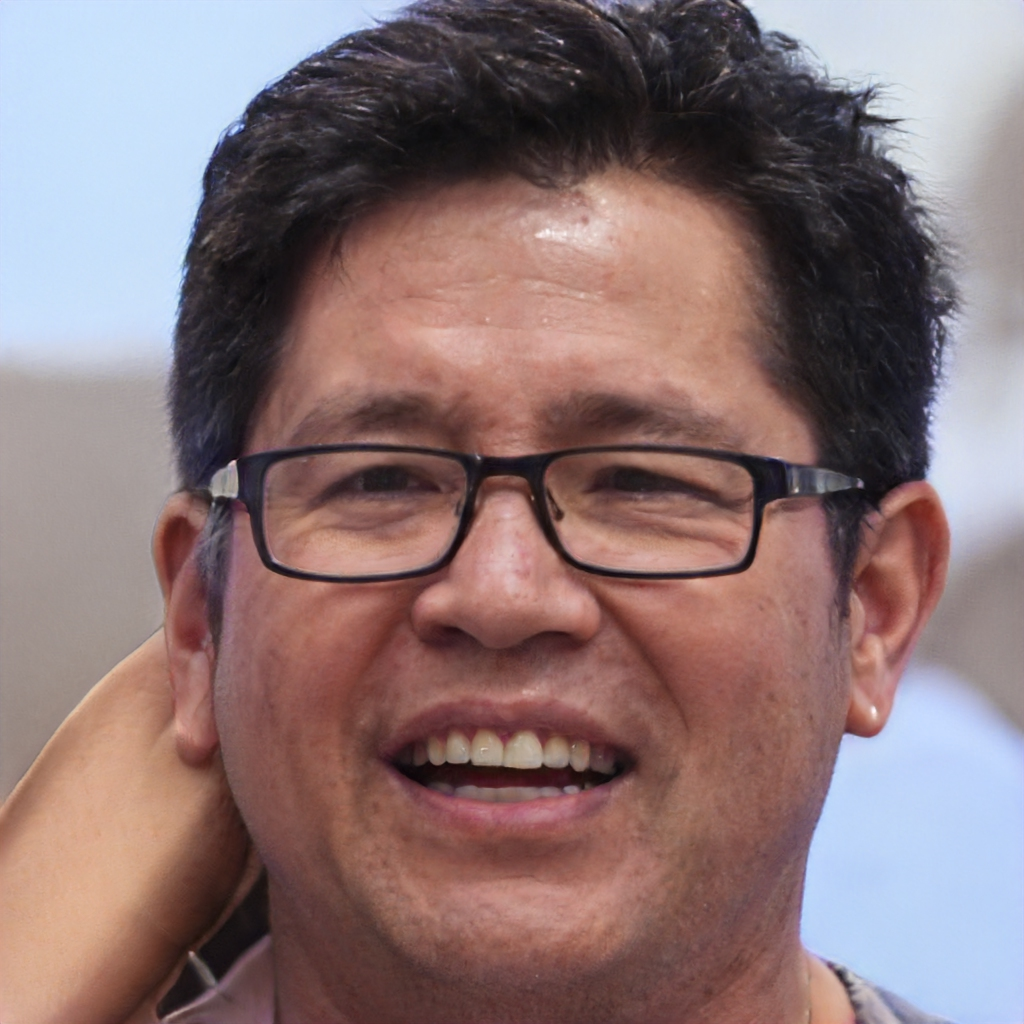

In [3]:
import requests 

image_link = 'https://www.thispersondoesnotexist.com/image'
r = requests.get(image_link).content 

with open('person.jpg', 'wb+') as f: 
	f.write(r) 

from IPython.display import Image
Image('person.jpg')

In [4]:
prompt = input("Ask this person a question: ")

import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

driver.get("http://textsynth.org/")
driver.implicitly_wait(10)

inputElement = driver.find_element_by_id('input_text')
inputElement.click()
inputElement.clear()
inputElement.send_keys(prompt)
button = driver.find_element_by_id('submit_button')
ActionChains(driver).move_to_element(button).click(button).perform()
time.sleep(10)

responseElement = driver.find_element_by_id('gtext')
response = responseElement.text
response = response[len(prompt):].replace('\n', ' ')
print(response)

Ask this person a question: what is 10 + 20
 + 50?):  5 + 0 + 0  0 + 0 + 0  0 + 0 + 0  0 + 0 + 0  0 + 0 + 0  0 + 0 + 0  0 + 0 + 0  0 + 0 + 0  0 + 0 + 0  0 + 0 + 0  0 + 0 + 0  0 + 0 + 0  0 + 0 + 0  0 + 0


In [5]:
!git clone https://github.com/NVIDIA/flowtron.git
%cd flowtron
!git submodule update --init
%cd tacotron2
!git submodule update --init
%cd ..

# Create a virtual env so we can run different versions of packages 
# required for different repositories used in this notebook.
!pip install virtualenv
!virtualenv flowtronenv
!source flowtronenv/bin/activate; pip install numpy==1.16.4 inflect==0.2.5 librosa==0.6.0 scipy==1.0.0 tensorboardX==1.1 Unidecode==1.0.22 pillow matplotlib numba==0.48; pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# Download the pre-trained models.
!wget -N  -q https://raw.githubusercontent.com/yhgon/colab_utils/master/gfile.py
!mkdir models
!python gfile.py -u 'https://drive.google.com/open?id=1KhJcPawFgmfvwV7tQAOeC253rYstLrs8' -f 'models/flowtron_libritts.pt'
!python gfile.py -u 'https://drive.google.com/open?id=1Cjd6dK_eFz6DE0PKXKgKxrzTUqzzUDW-' -f 'models/flowtron_ljs.pt'
!python gfile.py -u 'https://drive.google.com/open?id=1Rm5rV5XaWWiUbIpg5385l5sh68z2bVOE' -f 'models/waveglow_256channels_v4.pt'


fatal: destination path 'flowtron' already exists and is not an empty directory.
/content/flowtron
/content/flowtron/tacotron2
/content/flowtron
created virtual environment CPython3.6.9.final.0-64 in 557ms
  creator CPython3Posix(dest=/content/flowtron/flowtronenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: Pillow==8.1.0, Unidecode==1.0.22, audioread==2.1.9, cycler==0.10.0, decorator==4.4.2, future==0.18.2, inflect==0.2.5, joblib==1.0.1, kiwisolver==1.3.1, librosa==0.6.0, llvmlite==0.31.0, matplotlib==3.3.4, numba==0.48.0, numpy==1.16.4, pip==21.0.1, protobuf==3.14.0, pyparsing==2.4.7, python_dateutil==2.8.1, resampy==0.2.2, scikit_learn==0.24.1, scipy==1.0.0, setuptools==52.0.0, six==1.15.0, tensorboardX==1.1, threadpoolctl==2.1.0, torch==1.5.0+cu101, torchvision==0.6.0+cu101, wheel==0.36.2
  activators BashActivator,CShe

In [6]:
!pip install tensorboard

In [7]:
# !pip install unidecode

In [33]:
tts_text = response.replace('\n',' ').replace('"','')
print(tts_text)
!source /content/flowtron/flowtronenv/bin/activate; pip install scipy==1.4.0; cd /content/flowtron; pip install tensorboard; pip install matplotlib==2.1.0; python /content/flowtron/inference.py -c /content/flowtron/config.json -f /content/flowtron/models/flowtron_ljs.pt -w /content/flowtron/models/waveglow_256channels_v4.pt -t "$tts_text" -i 0

!cp './results/sid0_sigma0.5.wav' ./..
%cd ..
!mv '/content/flowtron/results/sid0_sigma0.5.wav' './speech.wav'

from IPython.display import Audio
sound_file = './results/sid0_sigma0.5.wav'
Audio(sound_file, autoplay=True)

? 5 / 10  $6  $2,000 $10,000  $3  $2,000 $5,000  $4  $2,000 $10,000  $5  $2,000 $25,000  $6  $2,000 $100,000  $7  $2,000 $200,000  $8  $2,000 $500
/content/flowtron/flowtronenv/lib/python3.6/site-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.conv.ConvTranspose1d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/content/flowtron/flowtronenv/lib/python3.6/site-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/content/flowtron/flowtronenv/lib/python3.6/site-packag

ValueError: ignored

In [ ]:

%cd /content
!git clone https://github.com/Rudrabha/LipGAN.git   --branch fully_pythonic --single-branch
%cd LipGAN
!pip install git+https://www.github.com/keras-team/keras-contrib.git; pip uninstall -y tensorflow tensorflow-gpu; pip install -U numpy; pip install tensorflow-gpu==1.14.0; pip install -U scipy
  
# Download the pre-trained LipGAN model and the Face Detector file
!wget -N  -q https://raw.githubusercontent.com/yhgon/colab_utils/master/gfile.py
!python gfile.py -u 'https://drive.google.com/open?id=1DtXY5Ei_V6QjrLwfe7YDrmbSCDu6iru1' -f './logs/lipgan_residual_mel.h5'
!wget 'http://dlib.net/files/mmod_human_face_detector.dat.bz2' -P './logs/'
!bunzip2 './logs/mmod_human_face_detector.dat.bz2'  

In [ ]:
%cd /content/LipGAN
!python batch_inference.py --checkpoint_path logs/lipgan_residual_mel.h5 --model residual --face "/content/person.jpg" --audio /content/speech.wav --results_dir /content

# !ffmpeg -i /content/result_voice.avi /content/result_voice.mp4
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/result_voice.avi','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""<video controls><source src="%s" type="video/mp4"></video>""" % data_url)